# Математика для машинного обучения
## Домашнее задание №5

_Автор задания: Илья Щуров_

Подготовлено для программы «[Практический анализ данных и машинное обучение](https://cs.hse.ru/dpo/bigml)» (ФКН НИУ ВШЭ).

Задание выполнил(а): Сергеев Дмитрий

## Статистика

### Описательные статистики

Для выборки $x_1, x_2, \ldots, x_n$ определены следующие величины (они часто называются *описательными статистиками*):

1. Выборочное среднее: $$\bar x = \frac{x_1 + x_2 + \ldots + x_n}{n}.$$
2. Выборочная дисперсия: $$\sigma^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n}.$$
3. Исправленная выборочная дисперсия: $$\sigma_+^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n - 1}.$$
4. Выборочное стандартное отклонение: квадратный корень из выборочной дисперсии (обозначается $\sigma$ или $SD$).
5. Исправленное выборочное стандартное отклонение: квадратный корень из исправленной выборочной дисперсии (обозначается $\sigma_+$ или $SD_+$ или ещё как-нибудь).
6. [Медиана](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0).

### Задача 1
Для выборки $\{1, 10, 2, 15, 100\}$ найти все характеристики, перечисленные выше.

Подсказка: можно использовать функции `np.mean`, `np.var`, `np.std`, `np.median`. Для вычисления исправленной выборочной дисперсии и исправленного выборочного стандартного отклонения необходимо соответствующим функциям передать параметр `ddof=1`.

In [1]:
import numpy as np
import math
import scipy.stats as sc

In [2]:
sample = np.array([1, 10, 2, 15, 100])

In [3]:
print('Выборочное среднее: {}'.format(round(np.mean(sample), 2)))
print('Выборочная дисперсия: {}'.format(round(np.var(sample), 2)))
print('Выборочная дисперсия (испр.): {}'.format(round(np.var(sample, ddof=1), 2)))
print('Выборочное стандартное отклонение: {}'.format(round(np.std(sample)), 2))
print('Исправленное выборочное стандартное отклонение: {}'.format(round(np.std(sample, ddof=1)), 2))
print('Медиана: {}'.format(round(np.median(sample)), 2))

Выборочное среднее: 25.6
Выборочная дисперсия: 1410.64
Выборочная дисперсия (испр.): 1763.3
Выборочное стандартное отклонение: 38.0
Исправленное выборочное стандартное отклонение: 42.0
Медиана: 10.0


### Квартет Энскомба
Загрузим набор данных, который называется «квартетом Энскомба». (Нам потребуется использовать пакет `pandas`.)

In [4]:
import pandas as pd
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv"
data = pd.read_csv(url, index_col=0)
data

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91


Для обращения к отдельным переменным (стобцам таблицы) нужно использовать такой синтаксис:

In [5]:
data['x1']

1     10
2      8
3     13
4      9
5     11
6     14
7      6
8      4
9     12
10     7
11     5
Name: x1, dtype: int64

(Первая колонка — номер наблюдения; на неё сейчас можно не обращать внимания.)

### Задача 2
1. Для каждой из переменных, входящих в «квартет Энскомба», найти среднее и выборочную дисперсию.
2. Для каждой из четырёх пар соответствующих переменных (`x1` и `y1`, `x2` и `y2` и т.д.) найти корреляцию Пирсона. (Подсказка: можно использовать функцию `pearsonr` из `scipy.stats`: она возвращает пару, первый элемент которой — коэффициент корреляции, а второй — *p-value* для проверки нулевой гипотезы об отсутствии зависимости между величинами.)
3. Для каждой из указанных пар переменных построить scatter plot. (Подсказка: можно использовать `plt.plot` или `plt.scatter`.)

*Квартет Энскомба демонстрирует, что даже если числовые характеристики выборок совпадают, их реальное распределение и характер связей между переменными могут существенно различаться. Поэтому визуализация — важный элемент анализа данных.*

In [6]:
meanVar = pd.DataFrame(data.mean()).T.append(pd.DataFrame(data.var()).T)
meanVar.index = ['Mean', 'Var']
meanVar

,x1,x2,x3,x4,y1,y2,y3,y4
Mean,9.0,9.0,9.0,9.0,7.500909,7.500909,7.50000,7.500909
Var,11.0,11.0,11.0,11.0,4.127269,4.127629,4.12262,4.123249


Дейситвительно выборочные средние и дисперсии практически идентичны

In [7]:
for i in range(1, 5):
    coef, pvalue = sc.pearsonr(data['x'+str(i)], data['y'+str(i)])
    print("Correlation between x{} and y{} is {}, pvalue - {}".format(i, i, round(coef, 3), round(pvalue, 3)))

Correlation between x1 and y1 is 0.816, pvalue - 0.002
Correlation between x2 and y2 is 0.816, pvalue - 0.002
Correlation between x3 and y3 is 0.816, pvalue - 0.002
Correlation between x4 and y4 is 0.817, pvalue - 0.002


Чудесно, корреляции тоже одинаковые и как на подбор значимые

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

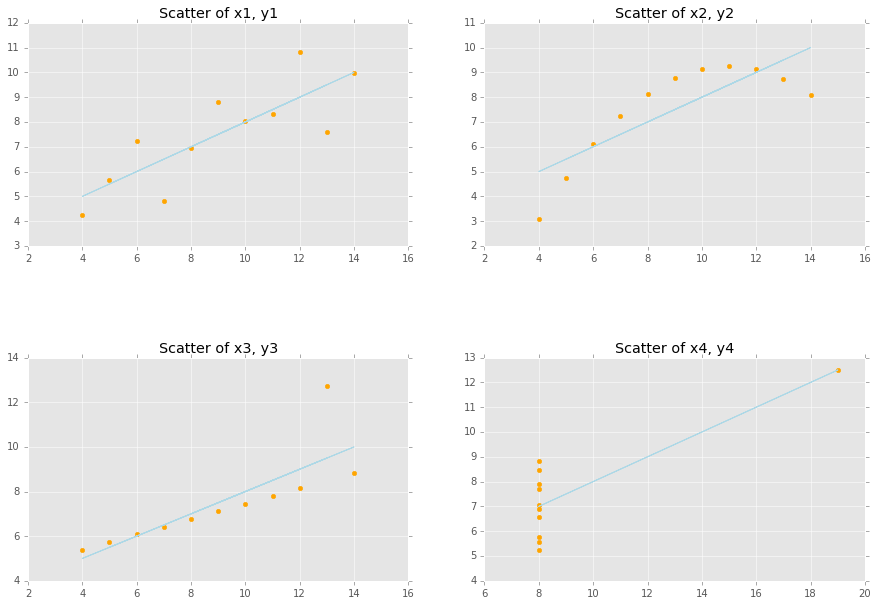

In [9]:
f, axarr = plt.subplots(2, 2, figsize=(15,10))
index = 1 
for i in range(2):
    for j in range(2):
        x, y = data['x'+str(index)], data['y'+str(index)]
        axarr[i, j].scatter(x, y, color = 'orange')
        axarr[i, j].set_title('Scatter of x{}, y{}'.format(index, index))
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        axarr[i, j].plot(x,p(x), color = 'lightblue')
        index += 1

f.subplots_adjust(hspace=0.5)

Вывод: визуализация - наше всё

### Задача 3
Будем проводить следующий эксперимент: сгенерируем две различные независимые выборки размером `n = 5` из равномерного распределения на отрезке $[0, 1]$. С помощью теста Стьюдента проверим гипотезу о том, что эти две выборки были получены из распределений с различными средними ($H_0\colon m_1 = m_2$, $H_1\colon m_1 ≠ m_2$) на уровне значимости 5%.

Повторим этот эксперимент 10000 раз. Сколько раз мы будем совершать ошибку первого рода, то есть ошибочно отвергать нулевую гипотезу? Что будет, если изменить уровень значимости (например, использовать уровень значимости 1%)? Что будет, если увеличить размер выборки до `n = 20`?

Для генерирования выборок можно использовать `uniform.rvs`, для теста Стьюдента — `ttest_ind` (обе функции из пакета `scipy.stats`). Последняя функция возвращает пару, состоящую из значения t-статистики и p-value.

In [10]:
from scipy.stats import uniform, ttest_ind

In [11]:
def generate(sample_size = 5, alpha = 0.05):
    pvalues = []
    for i in range(10000):
        sample_1, sample_2 = uniform.rvs(size = sample_size), uniform.rvs(size = sample_size)
        pvalues.append(ttest_ind(sample_1, sample_2).pvalue)
        
    mistakes = sum(np.array(pvalues)<alpha)
    percent = round((mistakes/10000)*100, 2)
    print("Размер выборки {}, уровень значимости {}. Совершили {} ошибок ({}% случаев)".format(sample_size, alpha, mistakes, percent)) 

In [12]:
generate()

Размер выборки 5, уровень значимости 0.05. Совершили 532 ошибок (0.0% случаев)


Изменили уровень значимости - число ошибок сократилось!

In [13]:
generate(alpha=0.01)

Размер выборки 5, уровень значимости 0.01. Совершили 124 ошибок (0.0% случаев)


А вот увеличение выборки как-то не помогло

In [14]:
generate(sample_size=20)

Размер выборки 20, уровень значимости 0.05. Совершили 537 ошибок (0.0% случаев)


### Задача 4
Будем проводить следующий численный эксперимент. Сгенерируем две независимые выборки из стандартного нормального распределения одинаковой длины `n = 10`. Посчитаем коэффициент корреляции Пирсона между ними. Повторим процедуру 1000 раз. Выберем пару выборок с наибольшим по модулю коэффициентом корреляции.

Указать, какой коэффициент корреляции получится. Нарисовать scatter plot для этой пары выборок.

*Эта задача показывает, что если долго искать, то можно найти хорошо коррелирующие переменные, даже если они заведомо были порождены независимыми случайными величинами.*

In [15]:
from scipy.stats import norm

In [16]:
coefs_dict = {}
for i in range(1000):
    sample_1, sample_2 = norm.rvs(size = 10), norm.rvs(size = 10)
    coef = sc.pearsonr(sample_1, sample_2)[0]
    coefs_dict[coef] = sample_1, sample_2

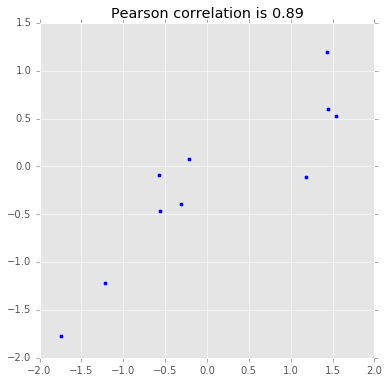

In [17]:
plt.scatter(coefs_dict[max(coefs_dict.keys())][0], coefs_dict[max(coefs_dict.keys())][1])
plt.title('Pearson correlation is {}'.format(round(max(coefs_dict.keys()), 2)))
plt.show()

И при этом на таком поиске корреляций построены тонны моделей в алгоритмическом трейтинге...

### Задача 5
Рассмотрим две выборки: $x = \{1, 3, 1, 5, 2, 6\}$ и $y = \{5, 9, 10, 4, 12\}$. Пусть мы проверяем гипотезу о том, что они были получены из распределений с различными средними ($H_0: m_1 = m_2$, $H_1: m_1 \ne m_2$). Будем действовать двумя методами:

1. Используя тест Стьюдента: найти p-value и сделать вывод о наличии статистически значимой разницы средних. (При использовании функции `ttest_ind` укажите параметр `equal_var=False`, поскольку дисперсии выборок существенно различаются.)
2. Используя компьютерную симуляцию (permutation test).

Компьютерная симуляция будет устроена следующим образом:

1. Запомнить разность средних двух исходных выборок: $\bar x - \bar y$.
2. 10000 раз повторить следущие действия:
    1. Перемешать выборки: взять случайный элемент первой выборки, случайный элемент второй выборки и поменять их местами. И так 100 раз.
    2. Посчитать разность средних получившихся выборок.

Вычислить, с какой частотой модуль разности перемешанных выборок будет оказываться больше или равным модулю разности исходных выборок. Сравнить в p-value, полученным с помощью применения t-теста.

In [18]:
x = [1, 3, 1, 5, 2, 6]
y = [5, 9, 10, 4, 12]

1) Для начала первый способ

In [19]:
stat, pvalue = ttest_ind(x, y, equal_var=0)
print(round(pvalue, 5))

0.02627


Что ж, на уровне значимости в 5% мы отвергаем нулевую гипотезу о равенстве средних

2) А теперь второй

In [20]:
from random import choice

In [21]:
def shuffle(x, y):
    x_new, y_new = x[:], y[:]  # а сначала долго не мог понять, почему же перестановка изменяет исходные вектора...
    for k in range(100):
        element_x, element_y = choice(x_new), choice(y_new)
        x_new[x_new.index(element_x)] = element_y
        y_new[y_new.index(element_y)] = element_x
    return x_new, y_new

In [24]:
mean_differences = []

for i in range(10000):
    x_new, y_new = shuffle(x, y)
    mean_differences.append(np.mean(x_new) - np.mean(y_new))
    
round(sum(np.abs(mean_differences) >= np.abs(np.mean(x) - np.mean(y)))/10000, 5)

0.0227

Что ж, p-value и наша частота очень похожи друг на друга, что логично - в численном тесте наша частота являлась оценкой *вероятности* того, что разница средних будет по модулю больше или равна модулю разности исходных средних, а распределение Стьюдента эту самую вероятность моделирует. Модель оказалась хорошей, численный тест не провалила :-)